# Gender Recognition by Voice and Speech Analysis

To identify a voice as male or female, based upon acoustic properties of the voice and speech.

In [1]:
# Dependancies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy

from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

## Loading and Preprocessing Dataset

In [2]:
# Read Datasets.
df = pd.read_csv("./voice.csv", header=0)

In [3]:
# View Data
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Summary of the Dataset

In [4]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


Impute Samples with missing values.

In [6]:
from sklearn.base import TransformerMixin

class Imputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [7]:
df.replace("?",np.NaN,inplace=True)
df = Imputer().fit_transform(df)

In [9]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Encode Categorical Variables into numeric form

In [10]:
for x in df.columns:
    if df[x].dtype == 'object':
        le = LabelEncoder()
        df[x] = le.fit_transform(list(df[x].values))
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


Divide data into feature and label matrices and split into training and testing sets.

In [11]:
y = df['label']
df.drop(['label'], axis=1, inplace=True)
X = df.copy()

# Split into train and test sets.(70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

### Feature importances with forests of trees
Use forests of trees to evaluate the importance of features on an artificial classification task. 
The red bars are the feature importances of the forest, along with their inter-trees variability.

Feature ranking:
1. feature 12 - meanfun (0.231763) 
2. feature 5 - IQR (0.211560) 
3. feature 3 - Q25 (0.128988) 
4. feature 1 - sd (0.091198) 
5. feature 8 - sp.ent (0.052583) 
6. feature 9 - sfm (0.038088) 
7. feature 10 - mode (0.030649) 
8. feature 0 - meanfreq (0.024122) 
9. feature 11 - centroid (0.023962) 
10. feature 4 - Q75 (0.023630) 
11. feature 2 - median (0.020796) 
12. feature 16 - mindom (0.015998) 
13. feature 17 - maxdom (0.015861) 
14. feature 6 - skew (0.015617) 
15. feature 13 - minfun (0.014278) 
16. feature 18 - dfrange (0.014052) 
17. feature 15 - meandom (0.013546) 
18. feature 14 - maxfun (0.012264) 
19. feature 7 - kurt (0.011825) 
20. feature 19 - modindx (0.009219) 


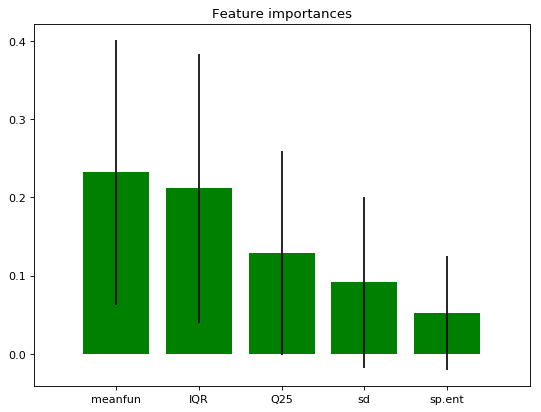

In [12]:
features = X.columns

forest = ExtraTreesClassifier(n_estimators=250, random_state=42)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

best_features = []
for i in indices[:5]:
    best_features.append(features[i])
    
# Plot the best features
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(5), importances[indices][:5], color="g",  yerr=std[indices][:5], align="center")
plt.xticks(range(5), best_features)
plt.xlim([-1, 5])
plt.show()

## Comparing Performances of Different Classifiers
<hr>
For each classifier we compute
* 10 fold cross_validations

### Decision Stumps

In [13]:
clf =  tree.DecisionTreeClassifier(max_depth = 1)

In [14]:
# CV Scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10)
print ('CV Scores :', scores)
print ('Mean :', scores.mean())

CV Scores : [ 0.91194969  0.97169811  0.96855346  0.95283019  0.9556962   0.94936709
  0.98417722  0.93670886  0.88291139  0.99050633]
Mean : 0.950439853515


### Decision Trees

In [15]:
dt =  tree.DecisionTreeClassifier(min_samples_leaf = 30)

In [16]:
# CV Scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X, y, cv=10)
print ('CV Scores :', scores)
print ('Mean :', scores.mean())

CV Scores : [ 0.91823899  0.93396226  0.98427673  0.94654088  0.95886076  0.98417722
  0.99683544  0.95253165  0.92405063  0.99367089]
Mean : 0.95931454502


### Logistic Regression

In [17]:
reg =  LogisticRegression(solver = 'lbfgs', n_jobs = -1)

In [18]:
# CV Scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, X, y, cv=10)
print ('CV Scores :', scores)
print ('Mean :', scores.mean())

CV Scores : [ 0.65408805  0.79559748  0.80503145  0.94968553  0.80063291  0.98417722
  0.88291139  0.96202532  0.91139241  0.89873418]
Mean : 0.864427593344


### K Nearest Neighbors

In [19]:
knn = KNeighborsClassifier()

In [20]:
# CV Scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=10)
print ('CV Scores :', scores)
print ('Mean :', scores.mean())

CV Scores : [ 0.52515723  0.62264151  0.64779874  0.76100629  0.77848101  0.76898734
  0.74367089  0.65822785  0.68987342  0.60759494]
Mean : 0.680343921662


### Naive Bayes

In [22]:
nb = BernoulliNB()

In [23]:
# CV Scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X, y, cv=10)
print ('CV Scores :', scores)
print ('Mean :', scores.mean())

CV Scores : [ 0.61006289  0.6163522   0.36163522  0.62578616  0.52531646  0.5         0.5
  0.5         0.44303797  0.59493671]
Mean : 0.527712761723


### SVM

In [24]:
svc = SVC()

In [25]:
# CV Scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, X, y, cv=10)
print ('CV Scores :', scores)
print ('Mean :', scores.mean())

CV Scores : [ 0.55345912  0.67295597  0.64150943  0.77987421  0.69303797  0.82278481
  0.76582278  0.70886076  0.64556962  0.61392405]
Mean : 0.689779874214


### Trying the ensemble methods : 
* Random Forests
* Adaboost
* Gradient Boost

#### Random Forests

In [26]:
rf = make_pipeline(RandomForestClassifier(n_estimators = 1000, n_jobs = -1))

In [27]:
# CV Scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=10)
print ('CV Scores :', scores)
print ('Mean :', scores.mean())

CV Scores : [ 0.93396226  0.94968553  0.98427673  0.95283019  0.96835443  0.99367089
  0.99050633  0.98734177  0.92721519  0.99367089]
Mean : 0.968151421065


#### Adaboost 

In [28]:
# Adaboost with decision stumps as base clf.
ada = make_pipeline(AdaBoostClassifier(n_estimators = 200))

In [29]:
# CV Scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ada, X, y, cv=10)
print ('CV Scores :', scores)
print ('Mean :', scores.mean())

CV Scores : [ 0.92767296  0.94025157  0.96855346  0.94654088  0.96835443  0.99683544
  0.99367089  0.9778481   0.89556962  0.99050633]
Mean : 0.960580367805


#### Gradient Boosting

In [30]:
gbm = make_pipeline(GradientBoostingClassifier())

In [31]:
# CV Scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbm, X, y, cv=10)
print ('CV Scores :', scores)
print ('Mean :', scores.mean())

CV Scores : [ 0.93396226  0.95283019  0.98427673  0.96226415  0.96835443  0.99367089
  0.99050633  0.98417722  0.92721519  0.99367089]
Mean : 0.969092827004


### Confusion Matrix and ROC plot

In [32]:
# generate the confusion matrix
gbm = make_pipeline(GradientBoostingClassifier())
gbm.fit(X_train,y_train)
pred = gbm.predict(X_test)

cnf = confusion_matrix(y_test, pred)

In [33]:
import itertools

# Function to plot Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[491   8]
 [ 15 532]]
Normalized confusion matrix
[[ 0.98396794  0.01603206]
 [ 0.0274223   0.9725777 ]]


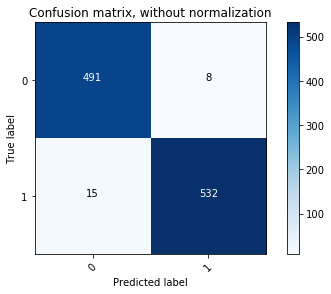

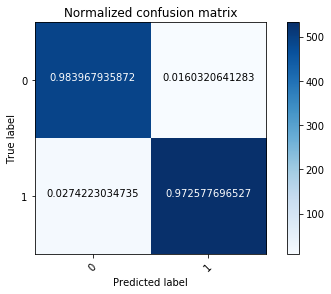

In [34]:
plt.figure()
plot_confusion_matrix(cnf, classes=['0','1'],
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf, classes=['0','1'], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

### ROC curves for Adaboost, KNN, Logistic Regression, GBM and Random Forests classifier

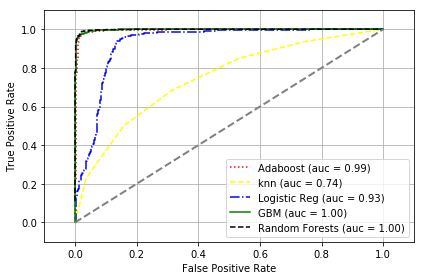

In [38]:
colors = ['red', 'yellow', 'blue', 'green', 'black']
linestyles = [':', '--', '-.', '-', '--']
all_clf = [ada, knn, reg, gbm, rf]
clf_labels = ['Adaboost', 'knn', 'Logistic Reg','GBM','Random Forests']
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, 
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.tight_layout()
plt.show()